In [0]:
import numpy as np
import skimage as sm
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
from skimage import io
import pandas as pd
import skimage.measure
import random
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 254;
 
# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = False

 
# Filter by Convexity
params.filterByConvexity = False

# Filter by Inertia
params.filterByInertia = False

In [0]:
#0 apple
#1 banana
#2 oranges
data = {'file name':[],'fruit type': [],'rgbmean': [],'convexity': [],'circularity': [],'inertia ratio': []}
features = pd.DataFrame(data)

In [0]:
#path = "/content/drive/My Drive/App Physics 186/Activity 13/fruits/apples/*.jpg"
#cropped_path = "/content/drive/My Drive/App Physics 186/Activity 13/fruits/apples/cropped/"

path = "/content/drive/My Drive/App Physics 186/Activity 13/fruits/bananas/*.jpg"
cropped_path = "/content/drive/My Drive/App Physics 186/Activity 13/fruits/bananas/cropped/"

#path = "/content/drive/My Drive/App Physics 186/Activity 13/fruits/oranges/*.jpg"
#cropped_path = "/content/drive/My Drive/App Physics 186/Activity 13/fruits/oranges/cropped/"


for file in glob.glob(path):
    #ftype = 'red'
    ftype = 'yellow'
    #ftype = 'orange' 
    filename = file[-6:-4]
    print(filename)
    fruit = cv2.imread(filename=file)
    gray = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]
    x,y,w,h = cv2.boundingRect(cnt)
    dst = fruit[y:y+h, x:x+w]
    
    save_file = cropped_path+filename+"-cropped.jpg"
    cv2.imwrite(save_file,dst)
    fruit_c = cv2.imread(filename=save_file)
    fruit_rgb_mean = np.mean(fruit_c/256)
    
    im = cv2.imread(save_file, cv2.IMREAD_GRAYSCALE)
    ret,thresh = cv2.threshold(im,240,255,cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
  # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector_create(params)
  # Detect blobs.
    keypoints = detector.detect(thresh)
    label, N = sm.measure.label(thresh, background=0, return_num=True)
    
    if N!=1:
        while N != 1:
            thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
            detector = cv2.SimpleBlobDetector_create(params)
            keypoints = detector.detect(thresh)
            label, N = sm.measure.label(thresh, background=0, return_num=True)
        #print(filename,N)
        binary = cropped_path+filename+"-binary.jpg"
        cv2.imwrite(binary,thresh)
        reg = sm.measure.regionprops(label,thresh)
        area = reg[0].area
        conv_area = reg[0].convex_area
        perimeter = reg[0].perimeter
        inertia_a = reg[0].inertia_tensor_eigvals[0]
        inertia_b = reg[0].inertia_tensor_eigvals[1]
    
        convexity = area / conv_area
        circularity = (4* np.pi * area) / (perimeter**2)
        inertia = inertia_b/inertia_a
        #print(filename,' RGB MEAN:',fruit_rgb_mean,'; N:',N,'; Convexity:', convexity,'; Circularity:',circularity,'; Inertia:',inertia)
        new_entry = {'file name': filename,'fruit type':ftype, 'rgbmean':fruit_rgb_mean, 'convexity':convexity, 'circularity':circularity, 'inertia ratio':inertia}
        features = features.append(new_entry, ignore_index=True)
        
        continue
        
    #print(N)
    binary = cropped_path+filename+"-binary.jpg"
    cv2.imwrite(binary,thresh)
    
    reg = sm.measure.regionprops(label,thresh)
    area = reg[0].area
    conv_area = reg[0].convex_area
    perimeter = reg[0].perimeter
    inertia_a = reg[0].inertia_tensor_eigvals[0]
    inertia_b = reg[0].inertia_tensor_eigvals[1]
    
    convexity = area / conv_area
    circularity = (4* np.pi * area) / (perimeter**2)
    inertia = inertia_b/inertia_a
    #print(filename,' RGB MEAN:',fruit_rgb_mean,'; N:',N,'; Convexity:', convexity,'; Circularity:',circularity,'; Inertia:',inertia)
    
    new_entry = {'file name': filename,'fruit type':ftype, 'rgbmean':fruit_rgb_mean, 'convexity':convexity, 'circularity':circularity, 'inertia ratio':inertia}
    features = features.append(new_entry, ignore_index=True)
    

05


/usr/local/lib/python3.6/dist-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/usr/local/lib/python3.6/dist-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


14
15
21
22
26
51
28
32
29
34
36
31
53


In [0]:
print(features)

   file name fruit type   rgbmean  convexity  circularity  inertia ratio
0         07     orange  0.701938   0.965575     0.819986       0.929943
1         05     orange  0.674675   0.938293     0.686356       0.754789
2         21     orange  0.675878   0.987736     0.907874       0.936110
3         22     orange  0.693446   0.965076     0.864644       0.954082
4         23     orange  0.700426   0.983590     0.908272       0.981062
5         24     orange  0.726859   0.980538     0.892948       0.938851
6         25     orange  0.704399   0.981006     0.891755       0.990039
7         28     orange  0.631842   0.965679     0.822616       0.982167
8         26     orange  0.671134   0.980462     0.882225       0.977438
9         27     orange  0.672425   0.967640     0.870001       0.959641
10        29     orange  0.670023   0.968634     0.860322       0.915991
11        01        red  0.515804   0.924207     0.509272       0.663448
12        02        red  0.595774   0.998937     0.

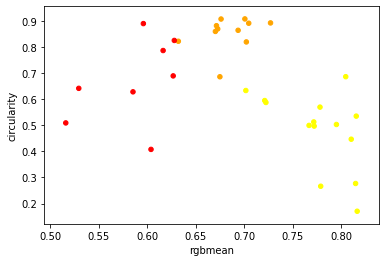

In [0]:
features.plot(x ='rgbmean', y='circularity', kind = 'scatter',  c=features['fruit type'])

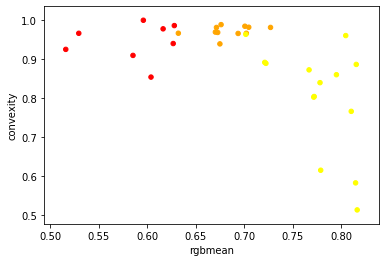

In [0]:
features.plot(x ='rgbmean', y='convexity', kind = 'scatter',  c=features['fruit type'])

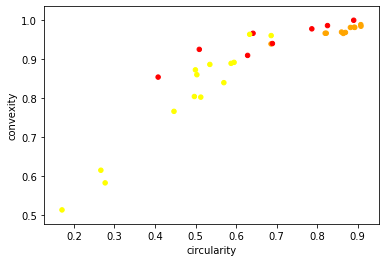

In [0]:
features.plot(x ='circularity', y='convexity', kind = 'scatter',  c=features['fruit type'])

In [0]:
from mpl_toolkits.mplot3d import Axes3D

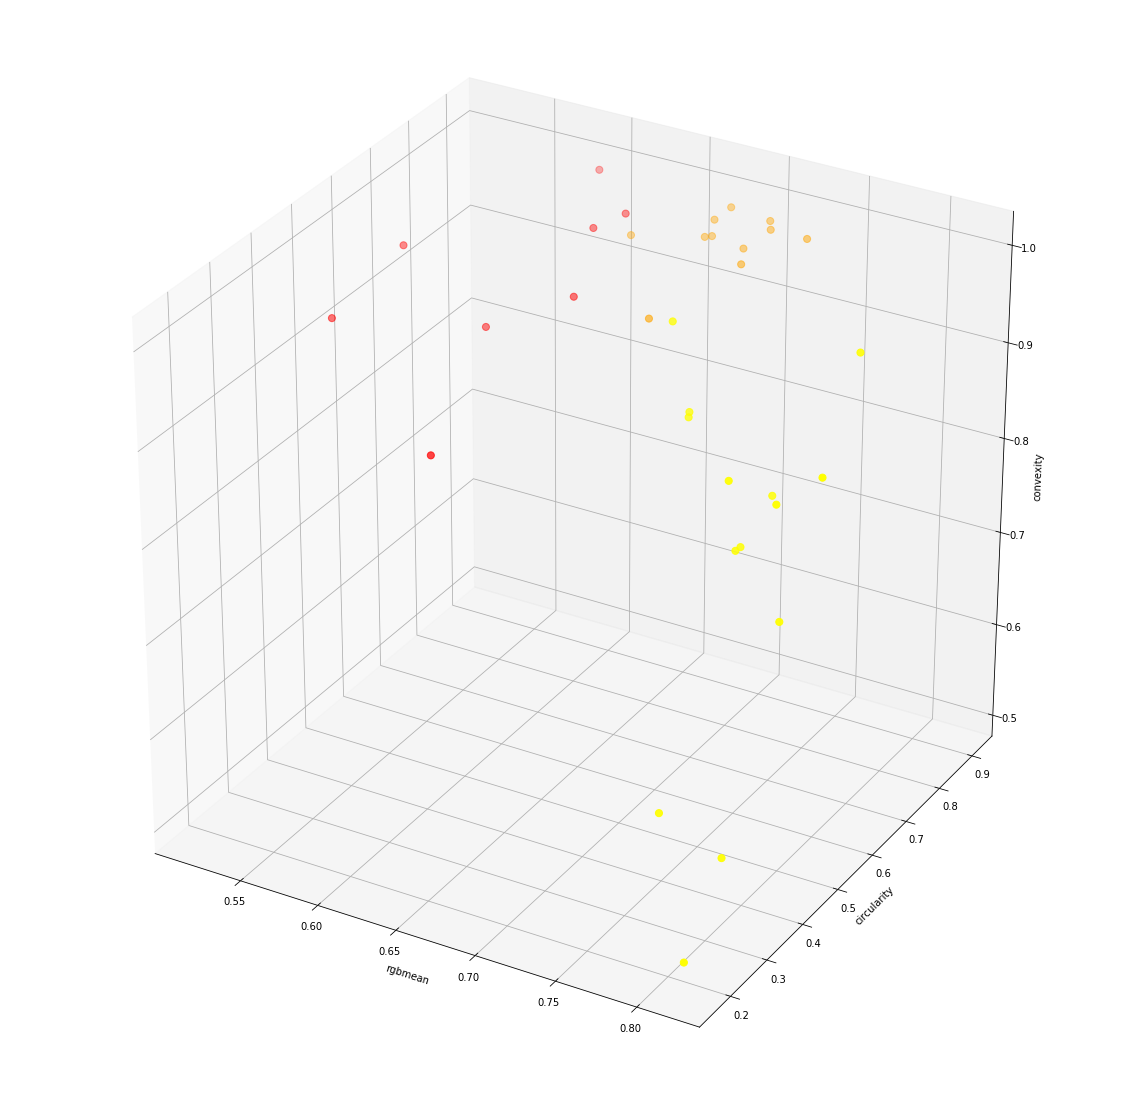

In [0]:
threeD = plt.figure(figsize = [20,20]).gca(projection='3d')
threeD.scatter(features['rgbmean'], features['circularity'], features['convexity'],c=features['fruit type'], s =50)
threeD.set_xlabel('rgbmean')
threeD.set_ylabel('circularity')
threeD.set_zlabel('convexity')
plt.show()

In [0]:
def g(a):
    if a>=0: return 1
    else: return -1

In [0]:
def two_classes(x1,x2,x3,x4):    
    vals = np.zeros(len(x1))
    vals[vals==0] = 1

    vals1 = np.zeros(len(x3))
    vals1[vals1==0] = -1

    X1 = list(zip(vals,x1, x2))
    X2 = list(zip(vals,x3, x4))
    X = X1 + X2
    X = np.array(X)
    X = X.astype(float)

    D1 = np.zeros(len(X1))
    D1[D1==0] = 1 
    D2 = np.zeros(len(X2))
    D2[D2==0] = -1
    D = np.append(D1,D2)

    return X,D

In [0]:
def perceptron(X,D):
    weight = np.zeros(3)
    weight[0],weight[1],weight[2] = random.random(), random.random(),random.random()

    learning_rate = random.random()

    epochs = 10000 
    for t in range(epochs):
        for i,x in enumerate(X):
            a = np.dot(x.T,weight)
            z = g(a)
            delta_w = learning_rate*(D[i] - z)*x
            weight += delta_w
    return weight

In [0]:
def line_parameters(w):
    A, B, C = w[1], w[2], -w[0]
    m = -A/B
    b = C/B
    return m, b

In [0]:
apple = features[features['fruit type'] == 'red']
banana = features[features['fruit type'] == 'yellow']
orange = features[features['fruit type'] == 'orange']

In [0]:
X1,D1 = two_classes(banana['rgbmean'], banana['circularity'], apple['rgbmean'], apple['circularity'])
w1 = perceptron(X1,D1)
m1,b1 = line_parameters(w1)

X2,D2 = two_classes(banana['rgbmean'], banana['circularity'], orange['rgbmean'], orange['circularity'])
w2 = perceptron(X2,D2)
m2,b2 = line_parameters(w2)

X3,D3 = two_classes(apple['rgbmean'], apple['circularity'], orange['rgbmean'], orange['circularity'])
w3 = perceptron(X3,D3)
m3,b3 = line_parameters(w3)

print(m1,b1)
print(m2,b2)
print(m3,b3)

2.641439979229067 -1.2184751744774562
0.7370645903916824 0.14998439563039187
10.80588026222531 -5.942955614073879


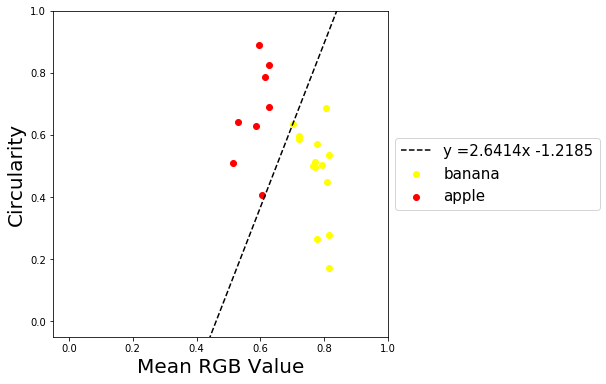

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'y =' + str(round(m1,4)) +'x ' + str(round(b1,4)))
plt.scatter(banana['rgbmean'], banana['circularity'], color='yellow', label='banana')
plt.scatter(apple['rgbmean'], apple['circularity'], color='red', label='apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Mean RGB Value', fontsize=20)
plt.ylabel('Circularity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

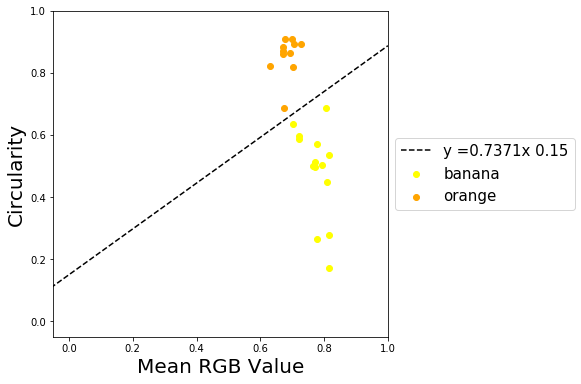

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals2 = b2 + m2*xvals
plt.plot(xvals, yvals2, color='black', linestyle='--', label = 'y =' + str(round(m2,4)) +'x ' + str(round(b2,4)))
plt.scatter(banana['rgbmean'], banana['circularity'], color='yellow', label='banana')
plt.scatter(orange['rgbmean'], orange['circularity'], color='orange', label='orange')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Mean RGB Value', fontsize=20)
plt.ylabel('Circularity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

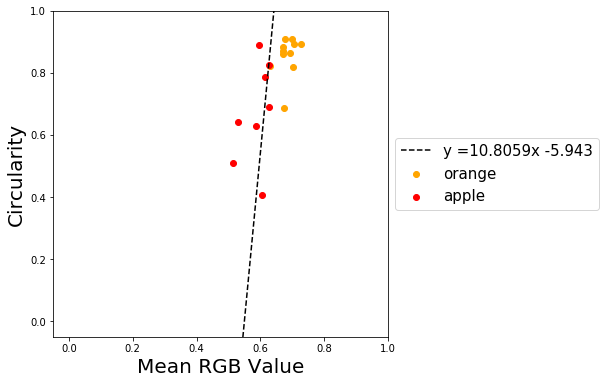

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals3, color='black', linestyle='--', label = 'y =' + str(round(m3,4)) +'x ' + str(round(b3,4)))
plt.scatter(orange['rgbmean'], orange['circularity'], color='orange', label='orange')
plt.scatter(apple['rgbmean'], apple['circularity'], color='red', label='apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Mean RGB Value', fontsize=20)
plt.ylabel('Circularity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

In [0]:
X1,D1 = two_classes(banana['rgbmean'], banana['convexity'], apple['rgbmean'], apple['convexity'])
w1 = perceptron(X1,D1)
m1,b1 = line_parameters(w1)

X2,D2 = two_classes(banana['rgbmean'], banana['convexity'], orange['rgbmean'], orange['convexity'])
w2 = perceptron(X2,D2)
m2,b2 = line_parameters(w2)

X3,D3 = two_classes(apple['rgbmean'], apple['convexity'], orange['rgbmean'], orange['convexity'])
w3 = perceptron(X3,D3)
m3,b3 = line_parameters(w3)

print(m1,b1)
print(m2,b2)
print(m3,b3)

1.314023009345606 0.0418537382503181
0.6635222626558318 0.4283510275753517
2.8534207429475766 -0.8060170343895524


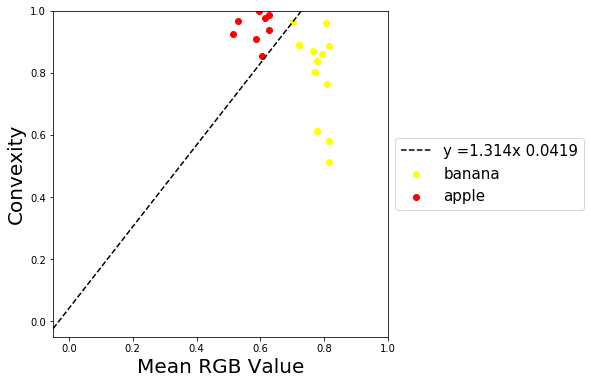

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'y =' + str(round(m1,4)) +'x ' + str(round(b1,4)))
plt.scatter(banana['rgbmean'], banana['convexity'], color='yellow', label='banana')
plt.scatter(apple['rgbmean'], apple['convexity'], color='red', label='apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Mean RGB Value', fontsize=20)
plt.ylabel('Convexity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

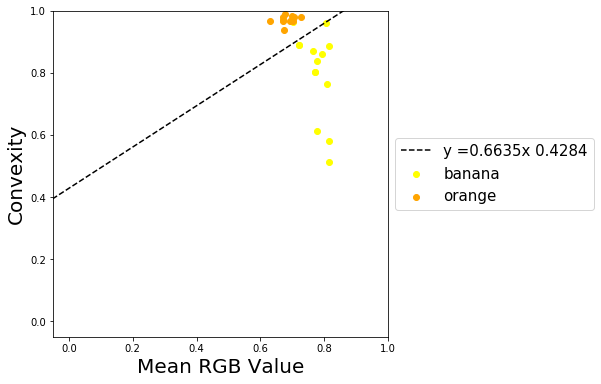

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals2 = b2 + m2*xvals
plt.plot(xvals, yvals2, color='black', linestyle='--', label = 'y =' + str(round(m2,4)) +'x ' + str(round(b2,4)))
plt.scatter(banana['rgbmean'], banana['convexity'], color='yellow', label='banana')
plt.scatter(orange['rgbmean'], orange['convexity'], color='orange', label='orange')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Mean RGB Value', fontsize=20)
plt.ylabel('Convexity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

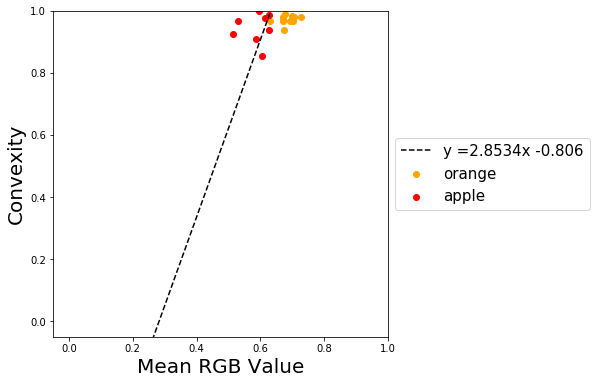

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals3, color='black', linestyle='--', label = 'y =' + str(round(m3,4)) +'x ' + str(round(b3,4)))
plt.scatter(orange['rgbmean'], orange['convexity'], color='orange', label='orange')
plt.scatter(apple['rgbmean'], apple['convexity'], color='red', label='apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Mean RGB Value', fontsize=20)
plt.ylabel('Convexity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

In [0]:
X1,D1 = two_classes(banana['circularity'], banana['convexity'], apple['circularity'], apple['convexity'])
w1 = perceptron(X1,D1)
m1,b1 = line_parameters(w1)

X2,D2 = two_classes(banana['circularity'], banana['convexity'], orange['circularity'], orange['convexity'])
w2 = perceptron(X2,D2)
m2,b2 = line_parameters(w2)

X3,D3 = two_classes(apple['circularity'], apple['convexity'], orange['circularity'], orange['convexity'])
w3 = perceptron(X3,D3)
m3,b3 = line_parameters(w3)

print(m1,b1)
print(m2,b2)
print(m3,b3)

0.21159349743095576 0.7614237991649299
8.824676456618 -5.118051828376366
0.2908119442762268 0.7409368108053324


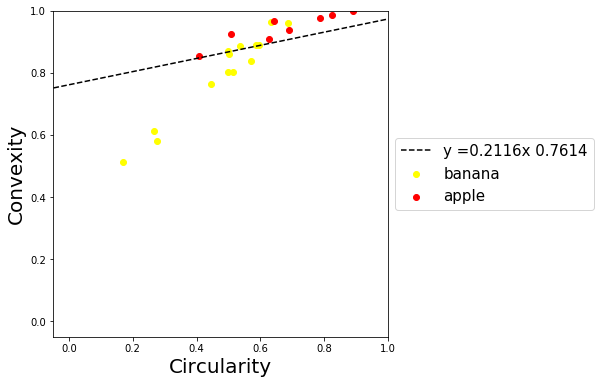

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'y =' + str(round(m1,4)) +'x ' + str(round(b1,4)))
plt.scatter(banana['circularity'], banana['convexity'], color='yellow', label='banana')
plt.scatter(apple['circularity'], apple['convexity'], color='red', label='apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Circularity', fontsize=20)
plt.ylabel('Convexity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

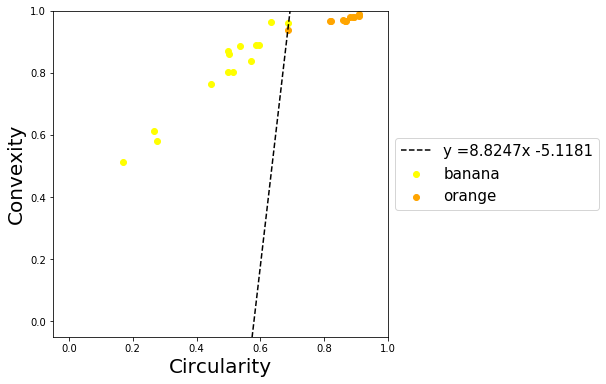

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals2 = b2 + m2*xvals
plt.plot(xvals, yvals2, color='black', linestyle='--', label = 'y =' + str(round(m2,4)) +'x ' + str(round(b2,4)))
plt.scatter(banana['circularity'], banana['convexity'], color='yellow', label='banana')
plt.scatter(orange['circularity'], orange['convexity'], color='orange', label='orange')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Circularity', fontsize=20)
plt.ylabel('Convexity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))

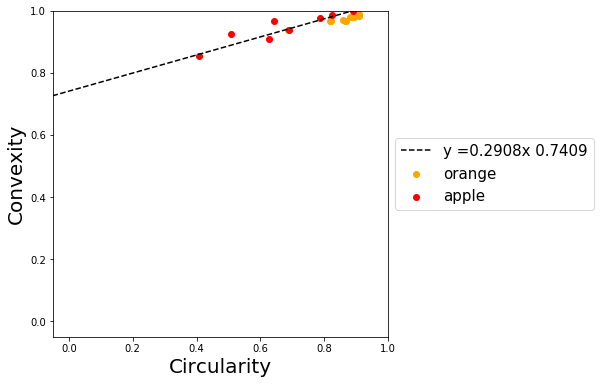

In [0]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals3, color='black', linestyle='--', label = 'y =' + str(round(m3,4)) +'x ' + str(round(b3,4)))
plt.scatter(orange['circularity'], orange['convexity'], color='orange', label='orange')
plt.scatter(apple['circularity'], apple['convexity'], color='red', label='apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('Circularity', fontsize=20)
plt.ylabel('Convexity', fontsize=20)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))